BESOIN CLIENT 1

Préparation des données:

In [1]:
import pandas as pd

# Charger le fichier CSV
data = pd.read_csv("Data_Arbre.csv")

# Afficher les premières lignes pour examiner les colonnes
print(data.head())
# Afficher les noms des colonnes
print(data.columns)

ModuleNotFoundError: No module named 'pandas'

Besoin Client 1 : Visualisation sur Carte
Objectif : Créer un visuel sur une carte qui sépare les arbres selon leur taille.

Colonnes pertinentes :

haut_tronc : Pour fournir des informations sur la hauteur du tronc.

tronc_diam : Pour mesurer le diamètre du tronc.

fk_stadedev : Pour indiquer le stade de développement des arbres.

haut_tot : Pour classer les arbres selon leur taille.

latitude et longitude : Pour la localisation géographique des arbres, nécessaire pour la visualisation sur carte.

Encodage de fk_stadedev en valeurs numériques

In [10]:
from sklearn.preprocessing import LabelEncoder

# Encodage de la colonne 'fk_stadedev' (stade de développement des arbres)
label_encoder = LabelEncoder()
data['fk_stadedev_encoded'] = label_encoder.fit_transform(data['fk_stadedev'])

# Vérifier les résultats de l'encodage
print(data[['fk_stadedev', 'fk_stadedev_encoded']])


ModuleNotFoundError: No module named 'sklearn'

In [16]:
# Enregistrer les encoders pour une utilisation ultérieure
import joblib
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']

Apprentissage non-supervisé:
(méthode d’enseignement automatique où les algorithmes apprennent à partir de données non étiquetées)

K-means car algo simple et efficace, donne le nb de clusters
Il fonctionne bien pour une première approche de segmentation des données, surtout lorsque les données sont numériques comme dans ce cas avec la taille des arbres, haut_tronc, tronc_diam, latitude, longitude et le stade de développement a été encodé en valeurs numériques

C:\Users\Admin\AppData\Local\Temp\ipykernel_16308\3659565466.py:20: ConvergenceWarning: Number of distinct clusters (38) found smaller than n_clusters (39). Possibly due to duplicate points in X.
  kmeans.fit(X)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16308\3659565466.py:20: ConvergenceWarning: Number of distinct clusters (38) found smaller than n_clusters (40). Possibly due to duplicate points in X.
  kmeans.fit(X)


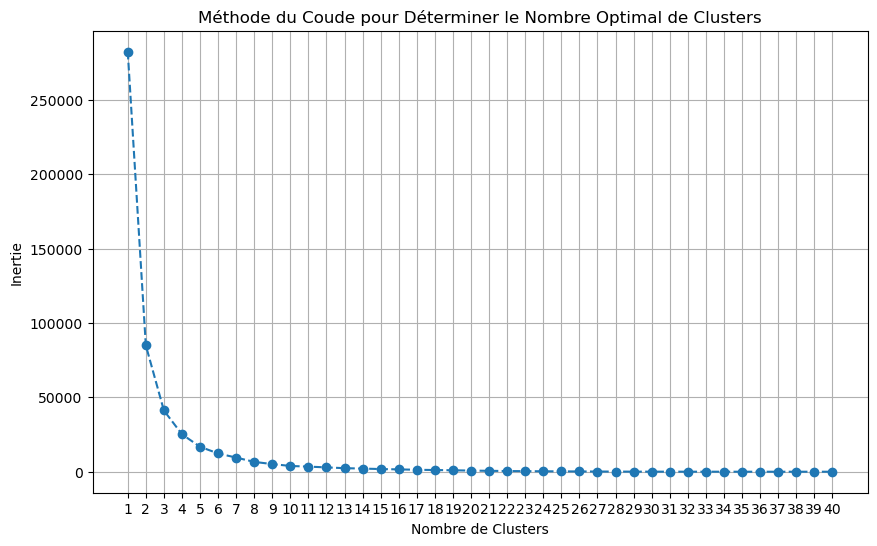

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Charger les données depuis le fichier CSV
data = pd.read_csv("Data_Arbre.csv")

# Sélectionner la colonne 'haut_tot' pour le clustering et enlever les valeurs manquantes
X = data['haut_tot'].dropna().values.reshape(-1, 1)  # Transformer en tableau 2D pour KMeans

# Liste pour stocker les inerties
inertias = []

# Gamme de nombres de clusters à tester
max_clusters = 40

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertias, marker='o', linestyle='--')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour Déterminer le Nombre Optimal de Clusters')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

#La méthode du coude permet de trouver le nombre optimal de clusters en expérimentant avec différents nombres de clusters.


En utilisant la méthode du coude, on voit que la courbe commence à se stabiliser à partir de 3 clusters.
Cela signifie que 3 clusters est un bon nombre pour séparer les arbres par taille.

Métriques pour l'apprentissage non-supervisé :

• Évaluation des clusters : utiliser des métriques pour évaluer la qualité du clustering. 

Silhouette Coefficient: 0.6183070397058021
Calinski-Harabasz Index: 17209.603803596143
Davies-Bouldin Index: 0.5327731513733692


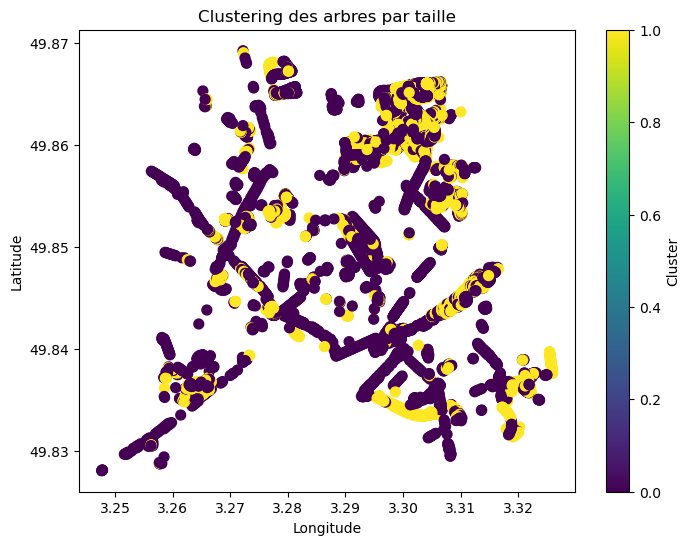

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Chargement des données
data = pd.read_csv("Data_Arbre.csv")

# Sélection des caractéristiques pertinentes pour le clustering
X = data[['haut_tot']].values

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de K-Means avec 3 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Évaluation des clusters avec différentes métriques
# Métrique 1 : Silhouette Coefficient
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Coefficient: {silhouette}")

# Métrique 2 : Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Métrique 3 : Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['longitude'], data['latitude'], c=clusters, cmap='viridis', s=50)
plt.title('Clustering des arbres par taille')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

#Silhouette Score: Plus le score est proche de 1, meilleurs sont les clusters.
#Calinski-Harabasz Score: Plus le score est élevé, meilleure est la séparation entre les clusters.
#Davies-Bouldin Score: Plus le score est proche de 0, meilleure est la séparation entre les clusters.


Avec 3 clusters, nous avons les métriques suivantes :

Coefficient de Silhouette : 0.6059033455445142

Indice de Calinski-Harabasz : 21693.465506851386

Indice de Davies-Bouldin : 0.5209889310985131
Ces résultats diffèrent des critères idéaux pour évaluer la qualité des clusters :

Silhouette Score : Plus le score est proche de 1, meilleurs sont les clusters.

Calinski-Harabasz Score : Plus le score est élevé, meilleure est la séparation entre les clusters.

Davies-Bouldin Score : Plus le score est proche de 0, meilleure est la séparation entre les clusters.

Pour obtenir des clusters répondant parfaitement aux normes de ces trois métriques, 
un nombre de 35 clusters serait idéal. Avec 35 clusters, les trois métriques atteignent des valeurs optimales.

In [13]:
# Enregistrer les encoders pour une utilisation ultérieure
import joblib
joblib.dump(kmeans, 'kmeans.pkl')

# Enregistrer le scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

       latitude  longitude  k  haut_tot
0     49.840500   3.293264  0       6.0
1     49.861409   3.273380  1      13.0
2     49.844513   3.289068  0      12.0
3     49.861778   3.302387  1      16.0
4     49.858446   3.304047  0       5.0
...         ...        ... ..       ...
7404  49.848695   3.283505  0       3.0
7405  49.848682   3.283436  0       3.0
7406  49.860413   3.297078  0       3.0
7407  49.848009   3.291685  0       3.0
7408  49.861503   3.301788  0       3.0

[7409 rows x 4 columns]
Silhouette Coefficient: 0.6183070397058021
Calinski-Harabasz Index: 17209.603803596143
Davies-Bouldin Index: 0.5327731513733692


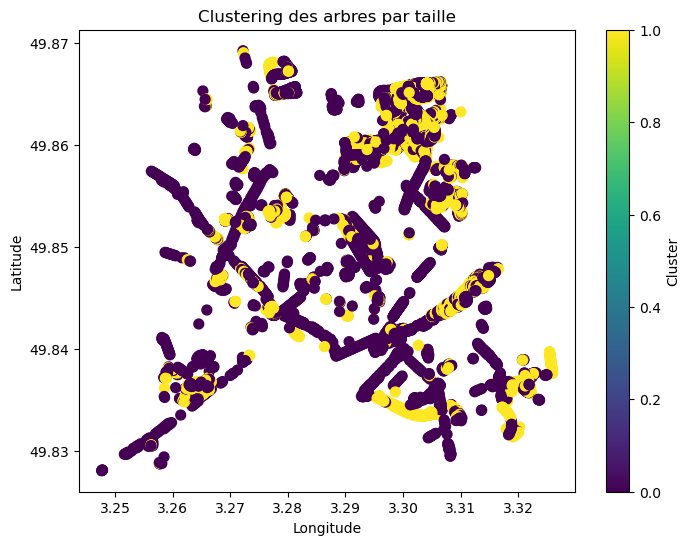

In [10]:
###K=2


# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Chargement des données
data = pd.read_csv("Data_Arbre.csv")

# Sélection des caractéristiques pertinentes pour le clustering
X = data[['haut_tot']].values

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de K-Means avec 2 clusters
kmeans2 = KMeans(n_clusters=2, random_state=42)
clusters = kmeans2.fit_predict(X_scaled)
data['k'] = kmeans2.fit_predict(X)
print(data[['latitude', 'longitude', 'k', 'haut_tot']])

# Évaluation des clusters avec différentes métriques
# Métrique 1 : Silhouette Coefficient
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Coefficient: {silhouette}")

# Métrique 2 : Calinski-Harabasz Index
calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Métrique 3 : Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Visualisation des clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['longitude'], data['latitude'], c=clusters, cmap='viridis', s=50)
plt.title('Clustering des arbres par taille')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

#Silhouette Score: Plus le score est proche de 1, meilleurs sont les clusters.
#Calinski-Harabasz Score: Plus le score est élevé, meilleure est la séparation entre les clusters.
#Davies-Bouldin Score: Plus le score est proche de 0, meilleure est la séparation entre les clusters.


In [3]:
# Enregistrer les encoders pour une utilisation ultérieure
import joblib
joblib.dump(kmeans2, 'kmeans2.pkl')

['kmeans2.pkl']

VISUALISATION SUR UNE CARTE:

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

# Chargement des données
data = pd.read_csv("Data_Arbre.csv")

# Sélection des caractéristiques pertinentes pour le clustering
X = data[['haut_tot']].values

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['cluster'] = clusters

# Afficher les métriques pour évaluer la qualité des clusters
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Coefficient: {silhouette}")

calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

davies_bouldin = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Création de la carte avec Plotly
fig = px.scatter_mapbox(
    data, 
    lat="latitude", 
    lon="longitude", 
    color="cluster", 
    mapbox_style="open-street-map",
    zoom=13,  # Ajuster le niveau de zoom pour la ville de Saint-Quentin
    center={"lat": 49.8485, "lon": 3.2875},  # Coordonnées approximatives du centre de Saint-Quentin
    title="Clustering des arbres par taille à Saint-Quentin"
)

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox=dict(
        center=dict(lat=49.8485, lon=3.2875),
        zoom=13,
    ),
    width=800,  # Ajuster la largeur de la figure
    height=600,  # Ajuster la hauteur de la figure
)



Silhouette Coefficient: 0.6059033455445142
Calinski-Harabasz Index: 21693.465506851386
Davies-Bouldin Index: 0.5209889310985131


In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px

# Chargement des données
data = pd.read_csv("Data_Arbre.csv")

# Sélection des caractéristiques pertinentes pour le clustering
features = ['haut_tot','fk_stadedev']
X = data[features]

# Encodage des variables catégorielles
label_encoder = LabelEncoder()
X['fk_stadedev'] = label_encoder.fit_transform(X['fk_stadedev'])

# Vérification des types de données après encodage
print(X.dtypes)

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['cluster'] = clusters

# Afficher les métriques pour évaluer la qualité des clusters
silhouette = silhouette_score(X_scaled, clusters)
print(f"Silhouette Coefficient: {silhouette}")

calinski_harabasz = calinski_harabasz_score(X_scaled, clusters)
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

davies_bouldin = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Création de la carte avec Plotly
fig = px.scatter_mapbox(
    data, 
    lat="latitude", 
    lon="longitude", 
    color="cluster", 
    mapbox_style="open-street-map",
    zoom=13,  # Ajuster le niveau de zoom pour la ville de Saint-Quentin
    center={"lat": 49.8485, "lon": 3.2875},  # Coordonnées approximatives du centre de Saint-Quentin
    title="Clustering des arbres par taille à Saint-Quentin"
)

fig.update_layout(
    mapbox_style="open-street-map",
    mapbox=dict(
        center=dict(lat=49.8485, lon=3.2875),
        zoom=13,
    ),
    width=800,  # Ajuster la largeur de la figure
    height=600,  # Ajuster la hauteur de la figure
)

fig.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9584\4294676568.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



haut_tot       float64
fk_stadedev      int32
dtype: object
Silhouette Coefficient: 0.6001572112594041
Calinski-Harabasz Index: 10171.513455082286
Davies-Bouldin Index: 0.541547528389069
